In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


In [2]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 0 GPUs, none
JAX sees: [CpuDevice(id=0)]


In [ ]:
Trainer.start_optuna_dashboard()

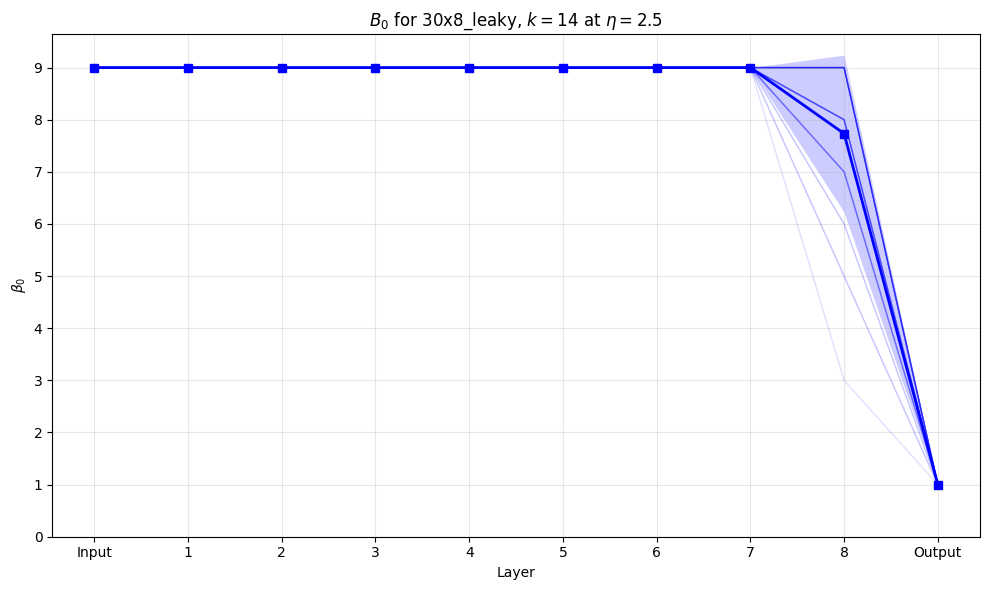

In [4]:
trainer = Trainer(
    dataset='D1',
    hidden_dims=[30] * 8,
    act_fn=lambda x: jax.nn.leaky_relu(x, negative_slope=0.2),
    study_name='30x8_leaky',
    residual=False
)

# trainer.run_optuna(
#     num_models=3,
#     T_func=lambda trial: 30,
#     start_lr_w_func=lambda trial: trial.suggest_float('lr_w', 1e-6, 5e-3, log=True),
#     start_lr_h_func=lambda trial: trial.suggest_float('lr_h', 1e-4, 8e-2, log=True),
#     trans_mult_func=lambda trial: trial.suggest_float('trans_mult', 3, 20),
#     decay_rate_func=lambda trial: trial.suggest_float('decay_rate', 0.85, 0.99),
#     add_trials=[{'lr_w': 4.875e-6, 'lr_h': 3.771e-2, 'trans_mult': 6.756, 'decay_rate': 0.9800}]
# )

# trainer.train_all_models(
#     T=30,
#     start_lr_w=5.760e-4,
#     start_lr_h=3.707e-4,
#     trans_mult=8.333,
#     decay_rate=0.8669,
#     model_ids=range(35)
# )

# trainer.run_ripser()

trainer.graph_betti_numbers(save=True)